In [ ]:
# MA5755 ASSIGNMENT 2
# NAME- KRISHAN AGYAKARI RAJA BABU
# ROLL NO.- EE22S042

# (A) PREDICT STOCK PRICES USING LINEAR REGRESSION (PART 1)

In [115]:
# 1. Given SBI stock listed in NSE data for last 5 years.

# 2. Take a sample data from the data given for last 5 years.

# 3.Model a Simple Linear Regression for stock price as a function of
# each attribute.

# 4. Find the best fit attribute for the taken sample.

# 5.Model a Simple Linear Regression for stock price of SBI as a function
# of sensex stock price data for last 5 years.

# 6.Make a report on statistical inferences from data and results from
# the above models.


In [2]:
# Import Necessary Libraries

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import confusion_matrix,accuracy_score
import math

In [3]:
#Reading given SBI stock data of last 5 years

sbi=pd.read_csv("SBIN.NS.txt")

In [4]:
#Data visualisation

sbi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-23,306.399994,320.549988,306.350006,318.100006,310.346680,35252217
1,2018-01-24,317.700012,331.600006,316.200012,329.899994,321.859100,38070520
2,2018-01-25,332.750000,332.750000,311.850006,313.149994,305.517334,42466150
3,2018-01-29,313.149994,316.899994,311.000000,312.100006,304.492920,23600898
4,2018-01-30,312.049988,318.850006,311.000000,313.549988,305.907562,25810404


In [9]:
#Checking number of rows and columns in given data

rows=sbi.shape[0]
col=sbi.shape[1]

print("No. of rows are :",rows)
print("No. of columns are:",col)

No. of rows are : 1235
No. of columns are: 7


In [10]:
#Getting information about given data
sbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [11]:
#Describing given data
sbi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,352.850446,357.466478,347.792793,352.536559,346.566569,3.236091e+07
std,119.221948,119.978945,118.487661,119.277664,120.192497,2.546596e+07
min,151.949997,153.199997,149.449997,150.850006,147.173218,3.312160e+06
25%,267.700012,271.375000,262.774994,267.675003,261.150741,1.531607e+07
50%,316.049988,321.450012,311.850006,316.450012,308.736908,2.343183e+07
75%,455.000000,462.399994,448.800003,454.324997,450.051452,4.193135e+07
max,625.549988,629.549988,617.500000,625.500000,625.500000,2.149557e+08


<AxesSubplot:>

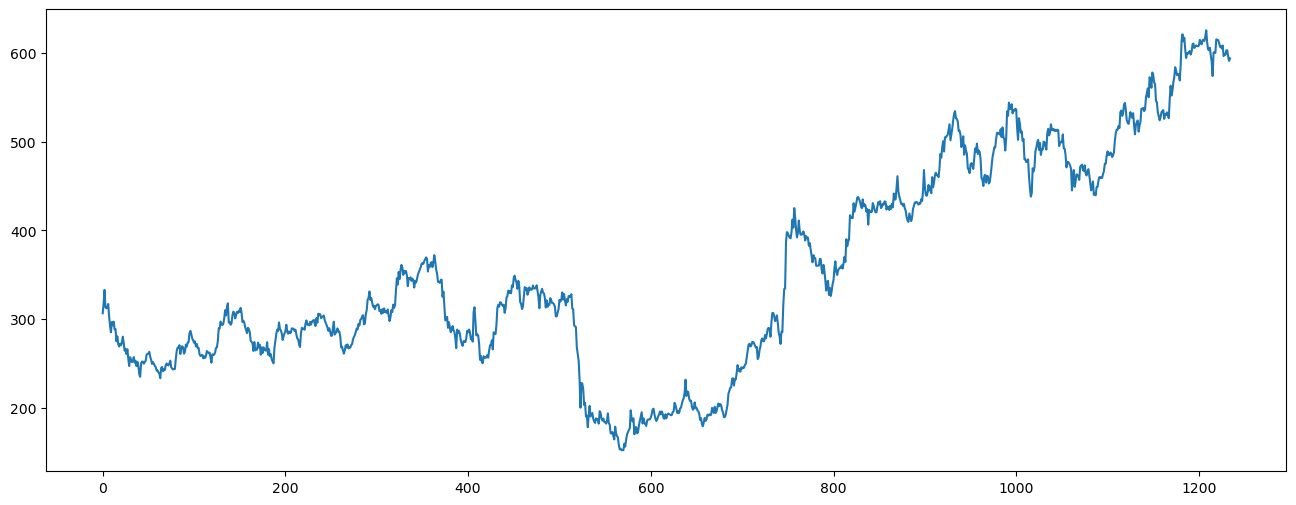

In [12]:
#Visualising open price
sbi['Open'].plot(figsize=(16,6))

<AxesSubplot:>

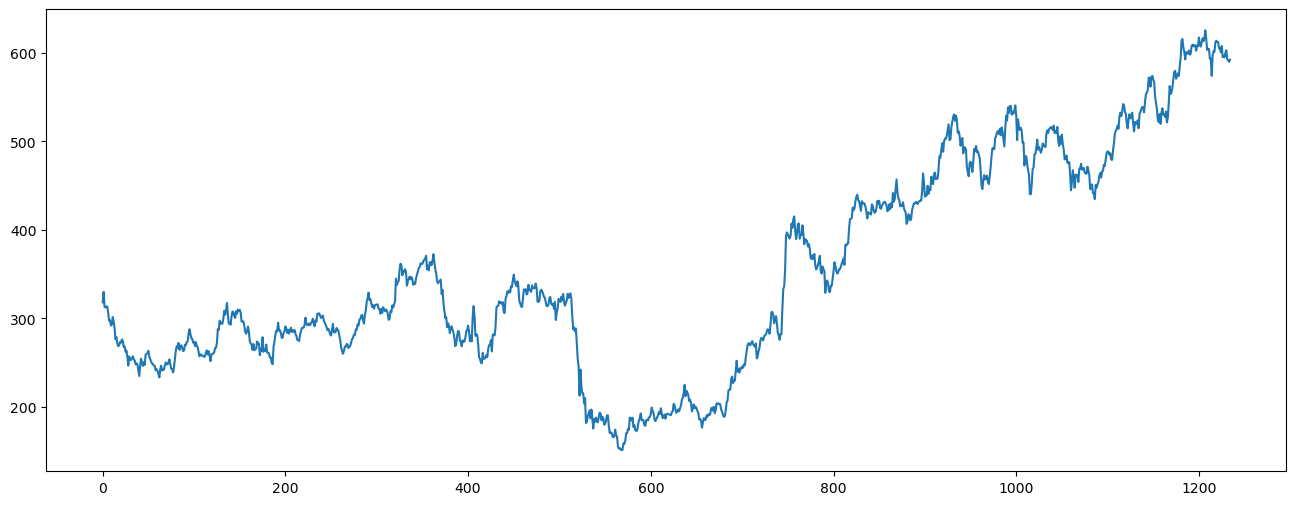

In [195]:
#Visualising close price
sbi['Close'].plot(figsize=(16,6))

# Modelling Stock Price (Close Price) as a function of each attribute

# (i) Modelling Stock Price as a function of "open price"

In [113]:
x1=sbi[['Open']]
y1=sbi['Close']
x1

,Open
0,306.399994
1,317.700012
2,332.750000
3,313.149994
4,312.049988
...,...
1230,603.000000
1231,603.000000
1232,595.900024
1233,591.000000


In [70]:
#Splitting given data into training & test data
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=0)

In [72]:
#Checking size of training and test data
print(x1_train.shape)
print(x1_test.shape)

(926, 1)
(309, 1)


In [160]:
# (i) Fitting Linear Regression Model for "Close Price" vs "Open Price"  
model1=LinearRegression()
model1.fit(x1_train,y1_train)

LinearRegression()

In [74]:
#Printing model coefficient & intercept
print(model1.coef_)
print(model1.intercept_)

[0.99877085]
0.09173901708442145


In [99]:
# (i) Predicting stock price with "open price" as attribute
predict1=model1.predict(x1_test)
predict1.shape

(309,)

In [100]:
#Priniting Test Data
print(x1_test)

            Open
1083  448.950012
18    269.000000
1099  484.000000
818   417.000000
184   260.250000
...          ...
907   441.850006
801   357.000000
1089  449.000000
435   318.950012
833   427.000000

[309 rows x 1 columns]


In [101]:
#Printing Actual & Predicted Stock Price with "Open Price" as attribute
dfr1=pd.DataFrame({'Actual Price':y1_test,'Predicted Price':predict1})
print(dfr1)

      Actual Price  Predicted Price
1083    451.350006       448.489926
18      269.649994       268.761099
1099    486.750000       483.496833
818     412.049988       416.579185
184     255.699997       260.021854
...            ...              ...
907     460.000000       441.398647
801     363.399994       356.652934
1089    451.399994       448.539853
435     317.549988       318.649715
833     430.350006       426.566894

[309 rows x 2 columns]


In [119]:
#Printing first 25 values of actual vs predicted stock price
dfr1.head(25)

,Actual Price,Predicted Price
1083,451.350006,448.489926
18,269.649994,268.761099
1099,486.750000,483.496833
818,412.049988,416.579185
184,255.699997,260.021854
608,190.750000,189.858201
1213,593.400024,596.357939
717,257.450012,254.578556
1137,536.700012,536.431688
1009,472.649994,479.501749


In [170]:
#Finding r2 score,mean absolute error and mean squared error of developed model 
score1=model1.score(x1_test,y1_test)*100
print('R2 score of model:',score1,'%')
ae1=metrics.mean_absolute_error(y1_test,predict1)
print('Mean Absolute Error:',ae1)
se1=metrics.mean_squared_error(y1_test,predict1)
print('Mean Squared Error:',se1)

R2 score of model: 99.67021970027129 %
Mean Absolute Error: 4.876195082568913
Mean Squared Error: 47.33196335771621


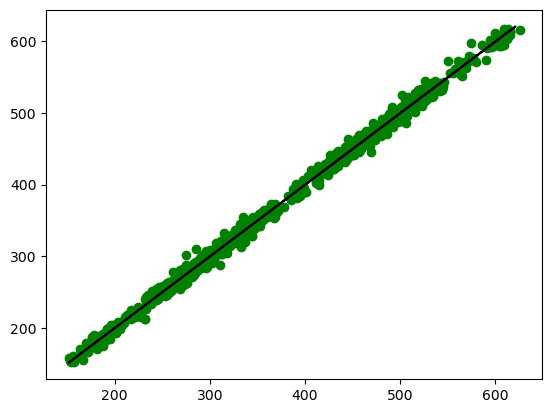

In [104]:
#Plotting scattter plot and regressor line
plt.scatter(x1_train, y1_train,color='g') 

plt.plot(x1_test, predict1,color='k')

<AxesSubplot:>

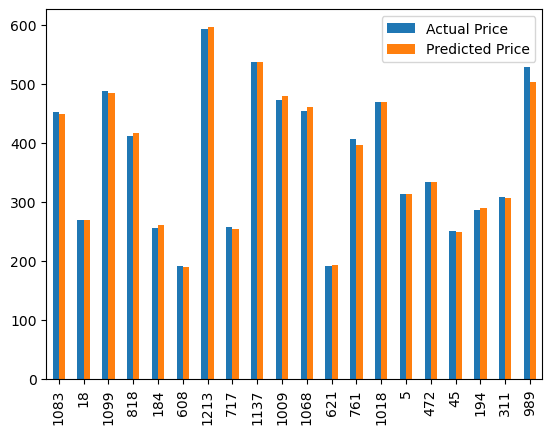

In [125]:
#Plotting actual price & predicted price in form of bar graph
graph1=dfr1.head(20)
graph1.plot(kind='bar')


# (ii) Modelling Stock Price as a function of "High price"

In [112]:
x2=sbi[['High']]
y2=sbi['Close']
x2

,High
0,320.549988
1,331.600006
2,332.750000
3,316.899994
4,318.850006
...,...
1230,606.099976
1231,606.000000
1232,597.150024
1233,591.750000


In [107]:
#Splitting given data into training & test data
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=0)

In [108]:
#Checking size of training and test data
print(x2_train.shape)
print(x2_test.shape)

(926, 1)
(309, 1)


In [159]:
# (ii) Fitting Linear Regression Model for "Close Price" vs "High Price"
model2=LinearRegression()
model2.fit(x2_train,y2_train)

LinearRegression()

In [110]:
#Printing model coefficient & intercept
print(model2.coef_)
print(model2.intercept_)

[0.99342704]
-2.6051003180197654


In [111]:
# (ii) Predicting stock price with "high price" as attribute
predict2=model2.predict(x2_test)
predict2.shape

(309,)

In [116]:
#Priniting Test Data
print(x2_test)

            High
1083  455.450012
18    274.200012
1099  488.250000
818   419.200012
184   261.799988
...          ...
907   462.299988
801   364.299988
1089  456.450012
435   318.950012
833   432.450012

[309 rows x 1 columns]


In [135]:
#Printing Actual & Predicted Stock Price with "High Price" as attribute
dfr2=pd.DataFrame({'Actual Price':y2_test,'Predicted Price':predict2})
print(dfr2)

      Actual Price  Predicted Price
1083    451.350006       449.851257
18      269.649994       269.792606
1099    486.750000       482.435652
818     412.049988       413.839527
184     255.699997       257.474087
...            ...              ...
907     460.000000       456.656209
801     363.399994       359.300359
1089    451.399994       450.844684
435     317.549988       314.248466
833     430.350006       427.002435

[309 rows x 2 columns]


In [118]:
#Printing first 25 values of actual vs predicted stock price
dfr2.head(25)

,Actual Price,Predicted Price
1083,451.350006,449.851257
18,269.649994,269.792606
1099,486.750000,482.435652
818,412.049988,413.839527
184,255.699997,257.474087
608,190.750000,189.374675
1213,593.400024,592.457697
717,257.450012,254.394487
1137,536.700012,531.709610
1009,472.649994,482.137636


In [171]:
#Finding r2 score,mean absolute error and mean squared error of developed model 
score2=model2.score(x2_test,y2_test)*100
print('R2 score of model:',score2,'%')
ae2=metrics.mean_absolute_error(y2_test,predict2)
print('Mean Absolute Error:',ae2)
se2=metrics.mean_squared_error(y2_test,predict2)
print('Mean Squared Error:',se2)

R2 score of model: 99.89414205673515 %
Mean Absolute Error: 2.9255752138807294
Mean Squared Error: 15.193340220313706


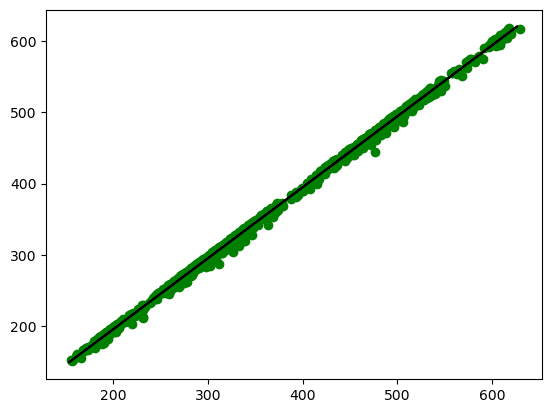

In [122]:
#Plotting scattter plot and regressor line
plt.scatter(x2_train, y2_train,color='g') 

plt.plot(x2_test, predict2,color='k')

<AxesSubplot:>

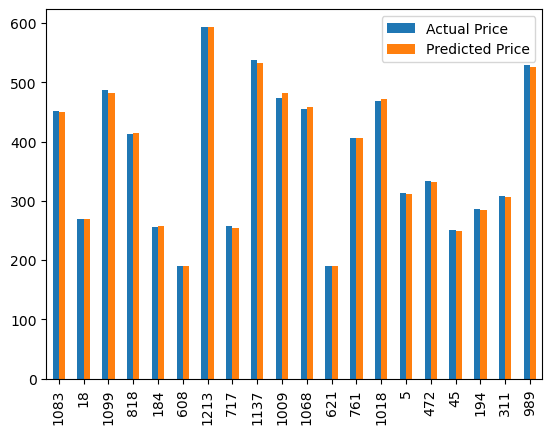

In [123]:
#Plotting actual price & predicted price in form of bar graph
graph2=dfr2.head(20)
graph2.plot(kind='bar')


# (iii) Modelling Stock Price as a function of "Low Price"

In [128]:
x3=sbi[['Low']]
y3=sbi['Close']
x3

,Low
0,306.350006
1,316.200012
2,311.850006
3,311.000000
4,311.000000
...,...
1230,600.599976
1231,586.049988
1232,587.599976
1233,587.549988


In [129]:
#Splitting given data into training & test data
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,random_state=0)

In [130]:
#Checking size of training and test data
print(x3_train.shape)
print(x3_test.shape)

(926, 1)
(309, 1)


In [158]:
# (iii) Fitting Linear Regression Model for "Close Price" vs "Low Price"
model3=LinearRegression()
model3.fit(x3_train,y3_train)

LinearRegression()

In [132]:
#Printing model coefficient & intercept
print(model3.coef_)
print(model3.intercept_)

[1.00558932]
2.7743839868256828


In [133]:
# (iii) Predicting stock price with "low price" as attribute
predict3=model3.predict(x3_test)
predict3.shape

(309,)

In [134]:
#Priniting Test Data
print(x3_test)

             Low
1083  448.600006
18    264.799988
1099  481.600006
818   405.299988
184   252.800003
...          ...
907   439.100006
801   356.049988
1089  446.000000
435   314.000000
833   416.700012

[309 rows x 1 columns]


In [136]:
#Printing Actual & Predicted Stock Price with "Low Price" as attribute
dfr3=pd.DataFrame({'Actual Price':y3_test,'Predicted Price':predict3})
print(dfr3)

      Actual Price  Predicted Price
1083    451.350006       453.881760
18      269.649994       269.054424
1099    486.750000       487.066208
818     412.049988       410.339724
184     255.699997       256.987368
...            ...              ...
907     460.000000       444.328661
801     363.399994       360.814450
1089    451.399994       451.267222
435     317.549988       318.529431
833     430.350006       421.803467

[309 rows x 2 columns]


In [137]:
#Printing first 25 values of actual vs predicted stock price
dfr3.head(25)

,Actual Price,Predicted Price
1083,451.350006,453.881760
18,269.649994,269.054424
1099,486.750000,487.066208
818,412.049988,410.339724
184,255.699997,256.987368
608,190.750000,192.579369
1213,593.400024,593.608378
717,257.450012,252.411933
1137,536.700012,536.993711
1009,472.649994,473.390187


In [172]:
#Finding r2 score,mean absolute error and mean squared error of developed model 
score3=model3.score(x3_test,y3_test)*100
print('R2 score of model:',score3,'%')
ae3=metrics.mean_absolute_error(y3_test,predict3)
print('Mean Absolute Error:',ae3)
se3=metrics.mean_squared_error(y3_test,predict3)
print('Mean Squared Error:',se3)

R2 score of model: 99.8146095549431 %
Mean Absolute Error: 3.16960945171918
Mean Squared Error: 26.60830182858744


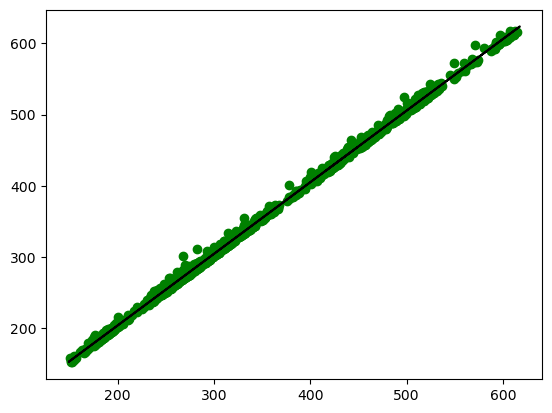

In [139]:
#Plotting scattter plot and regressor line
plt.scatter(x3_train, y3_train,color='g') 

plt.plot(x3_test, predict3,color='k')

<AxesSubplot:>

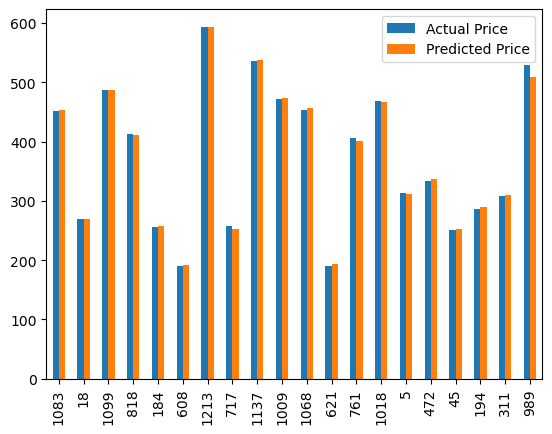

In [140]:
#Plotting actual price & predicted price in form of bar graph
graph3=dfr3.head(20)
graph3.plot(kind='bar')

# (iv) Modelling Stock Price as a function of "Adjusted Closing Price"

In [141]:
x4=sbi[['Adj Close']]
y4=sbi['Close']
x4

,Adj Close
0,310.346680
1,321.859100
2,305.517334
3,304.492920
4,305.907562
...,...
1230,603.000000
1231,592.950012
1232,591.450012
1233,589.849976


In [142]:
#Splitting given data into training & test data
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y4,random_state=0)

In [143]:
#Checking size of training and test data
print(x4_train.shape)
print(x4_test.shape)

(926, 1)
(309, 1)


In [157]:
# (iv) Fitting Linear Regression Model for "Close Price" vs "Adjusted Closing Price" 
model4=LinearRegression()
model4.fit(x4_train,y4_train)

LinearRegression()

In [145]:
#Printing model coefficient & intercept
print(model4.coef_)
print(model4.intercept_)

[0.99192947]
8.745466394982941


In [146]:
# (iv) Predicting stock price with "Adjusted Closing price" as attribute
predict4=model4.predict(x4_test)
predict4.shape

(309,)

In [147]:
#Priniting Test Data
print(x4_test)

       Adj Close
1083  451.350006
18    263.077606
1099  486.750000
818   402.006744
184   249.467621
...          ...
907   452.931488
801   354.542572
1089  451.399994
435   309.810089
833   423.737122

[309 rows x 1 columns]


In [148]:
#Printing Actual & Predicted Stock Price with "Adjusted Closing Price" as attribute
dfr4=pd.DataFrame({'Actual Price':y4_test,'Predicted Price':predict4})
print(dfr4)

      Actual Price  Predicted Price
1083    451.350006       456.452838
18      269.649994       269.699896
1099    486.750000       491.567135
818     412.049988       407.507802
184     255.699997       256.199751
...            ...              ...
907     460.000000       458.021557
801     363.399994       360.426691
1089    451.399994       456.502423
435     317.549988       316.055223
833     430.350006       429.062805

[309 rows x 2 columns]


In [149]:
#Printing first 25 values of actual vs predicted stock price
dfr4.head(25)

,Actual Price,Predicted Price
1083,451.350006,456.452838
18,269.649994,269.699896
1099,486.750000,491.567135
818,412.049988,407.507802
184,255.699997,256.199751
608,190.750000,193.344228
1213,593.400024,597.356437
717,257.450012,257.893324
1137,536.700012,541.114024
1009,472.649994,470.376660


In [173]:
#Finding r2 score,mean absolute error and mean squared error of developed model 
score4=model4.score(x4_test,y4_test)*100
print('R2 score of model:',score4,'%')
ae4=metrics.mean_absolute_error(y4_test,predict4)
print('Mean Absolute Error:',ae4)
se4=metrics.mean_squared_error(y4_test,predict4)
print('Mean Squared Error:',se4)

R2 score of model: 99.95343622947836 %
Mean Absolute Error: 2.1419868896348437
Mean Squared Error: 6.683099875707067


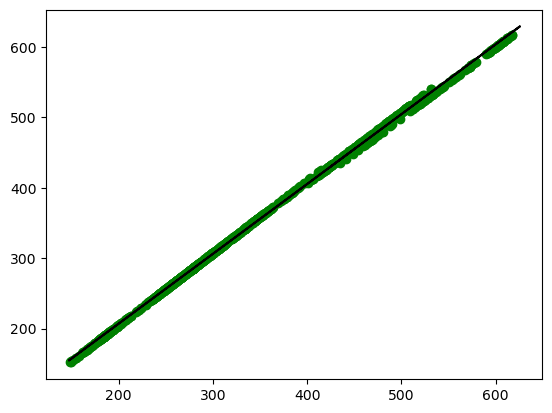

In [151]:
#Plotting scattter plot and regressor line
plt.scatter(x4_train, y4_train,color='g') 

plt.plot(x4_test, predict4,color='k')

<AxesSubplot:>

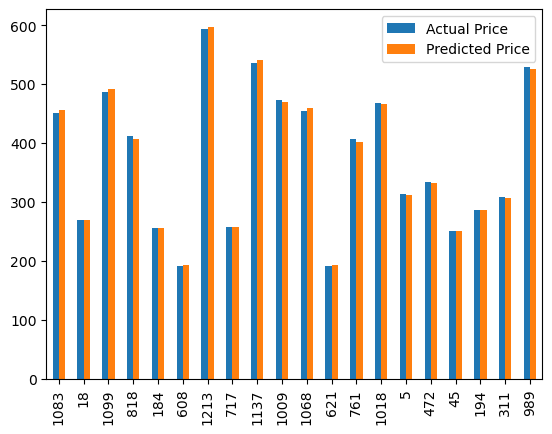

In [152]:
#Plotting actual price & predicted price in form of bar graph
graph4=dfr4.head(20)
graph4.plot(kind='bar')

# (v) Modelling stock price as a function of "Volume"

In [153]:
x5=sbi[['Volume']]
y5=sbi['Close']
x5

,Volume
0,35252217
1,38070520
2,42466150
3,23600898
4,25810404
...,...
1230,5483191
1231,13461999
1232,11538075
1233,7475688


In [154]:
#Splitting given data into training & test data
x5_train,x5_test,y5_train,y5_test=train_test_split(x5,y5,random_state=0)

In [155]:
#Checking size of training and test data
print(x5_train.shape)
print(x5_test.shape)

(926, 1)
(309, 1)


In [156]:
# (v) Fitting Linear Regression Model for vs "Close Price" vs "Volume"
model5=LinearRegression()
model5.fit(x5_train,y5_train)

LinearRegression()

In [161]:
#Printing model coefficient & intercept
print(model5.coef_)
print(model5.intercept_)

[-2.26593281e-06]
423.09780062905713


In [162]:
# (v) Predicting stock price with "Volume" as attribute
predict5=model5.predict(x5_test)
predict5.shape

(309,)

In [163]:
#Priniting Test Data
print(x5_test)

         Volume
1083    9920926
18     33458021
1099   11497832
818   142964052
184    25636533
...         ...
907    38635938
801    56696255
1089   12229833
435    32157080
833    30106015

[309 rows x 1 columns]


In [164]:
#Printing Actual & Predicted Stock Price with "Volume" as attribute
dfr5=pd.DataFrame({'Actual Price':y5_test,'Predicted Price':predict5})
print(dfr5)

      Actual Price  Predicted Price
1083    451.350006       400.617649
18      269.649994       347.284173
1099    486.750000       397.044486
818     412.049988        99.150865
184     255.699997       365.007139
...            ...              ...
907     460.000000       335.551361
801     363.399994       294.627896
1089    451.399994       395.385821
435     317.549988       350.232018
833     430.350006       354.879593

[309 rows x 2 columns]


In [165]:
#Printing first 25 values of actual vs predicted stock price
dfr5.head(25)

,Actual Price,Predicted Price
1083,451.350006,400.617649
18,269.649994,347.284173
1099,486.750000,397.044486
818,412.049988,99.150865
184,255.699997,365.007139
608,190.750000,319.606178
1213,593.400024,403.293210
717,257.450012,307.105672
1137,536.700012,400.397844
1009,472.649994,349.781195


In [174]:
#Finding r2 score,mean absolute error and mean squared error of developed model 
score5=model5.score(x5_test,y5_test)*100
print('R2 score of model:',score5,'%')
ae5=metrics.mean_absolute_error(y5_test,predict5)
print('Mean Absolute Error:',ae5)
se5=metrics.mean_squared_error(y5_test,predict5)
print('Mean Squared Error:',se5)

R2 score of model: 18.065912597940304 %
Mean Absolute Error: 93.40291659209797
Mean Squared Error: 11759.650973246207


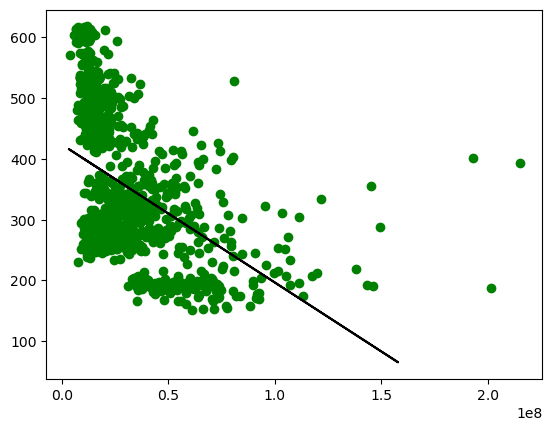

In [167]:
#Plotting scattter plot and regressor line
plt.scatter(x5_train, y5_train,color='g') 

plt.plot(x5_test, predict5,color='k')

<AxesSubplot:>

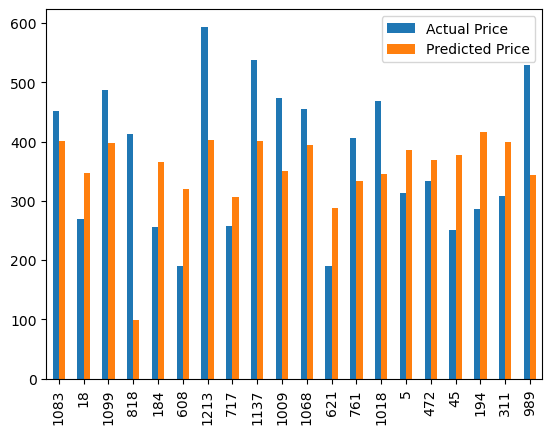

In [168]:
#Plotting actual price & predicted price in form of bar graph
graph5=dfr5.head(20)
graph5.plot(kind='bar')

# Finding the Best Fit Attribute 

In [186]:
#Defining r2 score,mean absolute error, mean squared error
score=[score1,score2,score3,score4,score5]
ae=[ae1,ae2,ae3,ae4,ae5]
se=[se1,se2,se3,se4,se5]
attributes=["Open","High","Low","Adj Close","Volume"]

#Finding maximum r2 score
max_score=max(score)
max_score_index=score.index(max_score)
print("Maximum R2 score is:",max_score,"for attribute:",attributes[max_score_index])

#Finding minimum mean absolute error
min_ae=min(ae)
min_ae_index=ae.index(min_ae)
print("Minimum mean absolute error is:",min_ae,"for attribute:",attributes[min_ae_index])

#Finding minimum mean squared error
min_se=min(se)
min_se_index=se.index(min_se)
print("Minimum mean squared error is:",min_se,"for attribute:",attributes[min_se_index])

#Finding minimum r2 score
min_score=min(score)
min_score_index=score.index(min_score)
print("Minimum R2 score is:",min_score,"for attribute:",attributes[min_score_index])

print("\n")
print("So,THE BEST FIT ATTRIBUTE FOR THE GIVEN SBI DATA IS:",attributes[max_score_index])
print("\n")
print("AND,THE WORST FIT ATTRIBUTE FOR THE GIVEN SBI DATA IS:",attributes[min_score_index])

Maximum R2 score is: 99.95343622947836 for attribute: Adj Close
Minimum mean absolute error is: 2.1419868896348437 for attribute: Adj Close
Minimum mean squared error is: 6.683099875707067 for attribute: Adj Close
Minimum R2 score is: 18.065912597940304 for attribute: Volume


So,THE BEST FIT ATTRIBUTE FOR THE GIVEN SBI DATA IS: Adj Close


AND,THE WORST FIT ATTRIBUTE FOR THE GIVEN SBI DATA IS: Volume


# Linear Regression Model for stock price of SBI as a function of sensex stock price data for last 5 years.


In [189]:
#Reading SBI sensex stock data of last 5 years

sbi1=pd.read_csv("SBIN.BO.csv")

In [190]:
#Data visualisation

sbi1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-29,313.799988,318.000000,310.000000,311.100006,303.520081,1897912
1,2018-01-30,311.049988,318.750000,310.799988,312.850006,305.227448,1516354
2,2018-01-31,313.000000,316.450012,307.649994,312.750000,305.129883,1593330
3,2018-02-01,316.049988,317.450012,304.500000,305.549988,298.105255,2992953
4,2018-02-02,302.000000,305.399994,295.049988,296.899994,289.666046,1746741


In [191]:
#Checking number of rows and columns in given data

rows1=sbi1.shape[0]
col1=sbi1.shape[1]

print("No. of rows are :",rows1)
print("No. of columns are:",col1)

No. of rows are : 1235
No. of columns are: 7


In [192]:
#Getting information about given data
sbi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [193]:
#Describing given data
sbi1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,353.620567,358.093765,348.493643,353.153118,347.205333,1.787682e+06
std,119.782132,120.550443,119.027446,119.825146,120.763371,1.544275e+06
min,152.000000,153.300003,149.550003,150.850006,147.174561,0.000000e+00
25%,267.600006,271.225006,263.050003,267.574997,261.055557,7.562940e+05
50%,316.100006,321.399994,312.299988,316.450012,308.739746,1.270634e+06
75%,456.949997,463.075012,451.050003,456.324997,450.710327,2.293521e+06
max,625.000000,629.650024,617.349976,625.549988,625.549988,1.214769e+07


<AxesSubplot:>

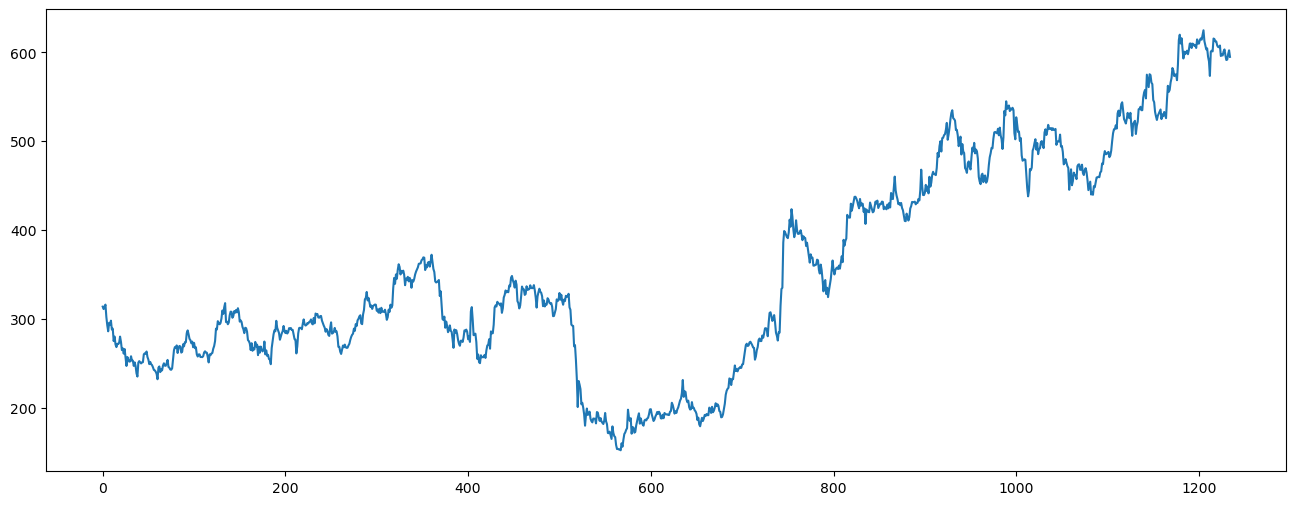

In [194]:
#Visualising open price
sbi1['Open'].plot(figsize=(16,6))

<AxesSubplot:>

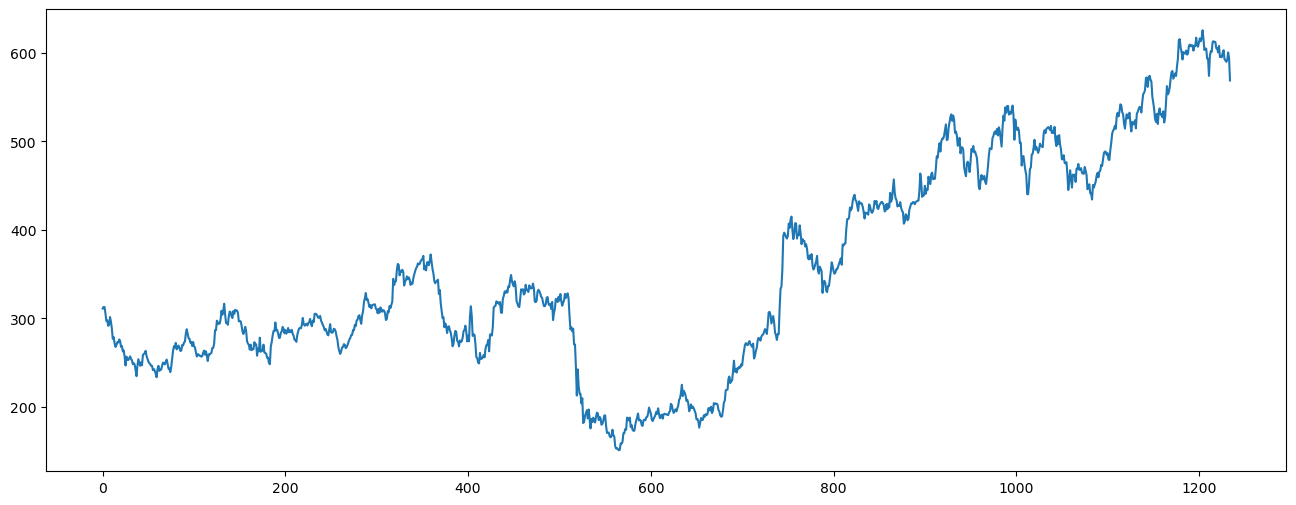

In [196]:
#Visualising close price
sbi1['Close'].plot(figsize=(16,6))

# Modelling Stock Price as a function of Sensex Data 

In [197]:
x11=sbi1[['Open','High','Low','Adj Close']]
y11=sbi1['Close']
x11

,Open,High,Low,Adj Close
0,313.799988,318.000000,310.000000,303.520081
1,311.049988,318.750000,310.799988,305.227448
2,313.000000,316.450012,307.649994,305.129883
3,316.049988,317.450012,304.500000,298.105255
4,302.000000,305.399994,295.049988,289.666046
...,...,...,...,...
1230,591.500000,591.500000,587.799988,589.900024
1231,592.000000,596.500000,590.500000,592.099976
1232,598.150024,601.500000,592.500000,600.450012
1233,602.450012,604.599976,593.000000,594.349976


In [198]:
#Splitting given data into training & test data
x11_train,x11_test,y11_train,y11_test=train_test_split(x11,y11,random_state=0)

In [199]:
#Checking size of training and test data
print(x11_train.shape)
print(x11_test.shape)

(926, 4)
(309, 4)


In [200]:
# Fitting Linear Regression Model for "Close Price of BSE" vs "Open Price,High Price,Low Price, Adj Close Price"  
model11=LinearRegression()
model11.fit(x11_train,y11_train)

LinearRegression()

In [201]:
#Printing model coefficient & intercept
print(model11.coef_)
print(model11.intercept_)

[-0.30580258  0.45614665  0.34035573  0.50465908]
4.077804682550038


In [202]:
# Predicting stock price with "open price,high price,low price,adjusted close price " as attribute for BSE sensex
predict11=model11.predict(x11_test)
predict11.shape

(309,)

In [203]:
#Priniting Test Data
print(x11_test)

            Open        High         Low   Adj Close
1083  442.500000  443.649994  430.799988  434.250000
18    273.049988  277.350006  272.700012  269.372864
1099  485.700012  491.100006  483.000000  484.799988
818   414.000000  428.950012  412.000000  414.937592
184   248.949997  268.750000  248.300003  261.518982
...          ...         ...         ...         ...
907   453.200012  464.200012  452.399994  455.939240
801   350.000000  352.350006  341.700012  341.911316
1089  459.500000  465.000000  458.000000  464.350006
435   315.299988  319.250000  313.299988  310.544617
833   420.500000  425.899994  416.700012  413.747284

[309 rows x 4 columns]


In [204]:
#Printing Actual & Predicted Stock Price with "Open Price,High Price,Low Price,Adj Close Price" as attribute
dfr11=pd.DataFrame({'Actual Price':y11_test,'Predicted Price':predict11})
print(dfr11)

      Actual Price  Predicted Price
1083    434.250000       436.903068
18      276.100006       275.847161
1099    484.799988       488.613640
818     425.299988       422.768228
184     268.049988       267.025921
...            ...              ...
907     463.049988       461.302156
801     350.450012       346.618381
1089    464.350006       465.891079
435     318.299988       316.635677
833     420.200012       420.388232

[309 rows x 2 columns]


In [205]:
#Printing first 25 values of actual vs predicted stock price
dfr11.head(25)

,Actual Price,Predicted Price
1083,434.250000,436.903068
18,276.100006,275.847161
1099,484.799988,488.613640
818,425.299988,422.768228
184,268.049988,267.025921
608,198.300003,198.559729
1213,601.849976,601.102175
717,275.149994,274.648444
1137,532.650024,535.369212
1009,474.399994,470.969006


In [206]:
#Finding r2 score,mean absolute error and mean squared error of developed model 
score11=model11.score(x11_test,y11_test)*100
print('R2 score of model:',score11,'%')
ae11=metrics.mean_absolute_error(y11_test,predict11)
print('Mean Absolute Error:',ae11)
se11=metrics.mean_squared_error(y11_test,predict11)
print('Mean Squared Error:',se11)

R2 score of model: 99.97814742893141 %
Mean Absolute Error: 1.386022775483708
Mean Squared Error: 3.1119364957148323


<AxesSubplot:>

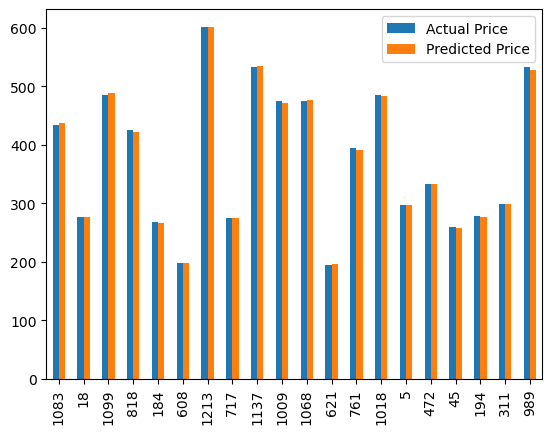

In [209]:
#Plotting actual price & predicted price in form of bar graph
graph11=dfr11.head(20)
graph11.plot(kind='bar')

# (B) PREDICT STOCK PRICES USING LINEAR REGRESSION (PART 2)

In [3]:
#Reading CANARA bank bombay stock exchange (sensex) data of last 5 years

canara=pd.read_csv("CANBK.BO.csv")

In [5]:
#Data visualisation

canara.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-29,364.500000,364.500000,341.049988,344.100006,332.755096,288461
1,2018-01-30,340.200012,353.350006,340.200012,348.450012,336.961670,191045
2,2018-01-31,348.500000,351.850006,338.899994,341.250000,329.999054,222265
3,2018-02-01,343.000000,360.000000,329.350006,330.200012,319.313385,323084
4,2018-02-02,325.000000,327.000000,308.799988,311.200012,300.939789,700045


In [6]:
#Checking number of rows and columns in given data

rows22=canara.shape[0]
col22=canara.shape[1]

print("No. of rows are :",rows22)
print("No. of columns are:",col22)

No. of rows are : 1235
No. of columns are: 7


In [7]:
#Getting information about given data
canara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [8]:
#Describing given data
canara.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,205.616437,209.411619,201.338664,205.158948,199.478209,6.665128e+05
std,66.272819,67.205726,65.177786,66.176439,65.126937,6.459586e+05
min,76.599998,78.199997,73.849998,76.250000,73.736053,0.000000e+00
25%,153.974998,156.149994,151.224998,153.575005,148.511665,3.083695e+05
50%,218.100006,222.899994,213.649994,218.399994,211.924652,4.574530e+05
75%,257.000000,262.174988,251.600006,256.474991,248.562546,7.701460e+05
max,364.500000,364.500000,341.049988,348.450012,336.961670,8.742660e+06


<AxesSubplot:>

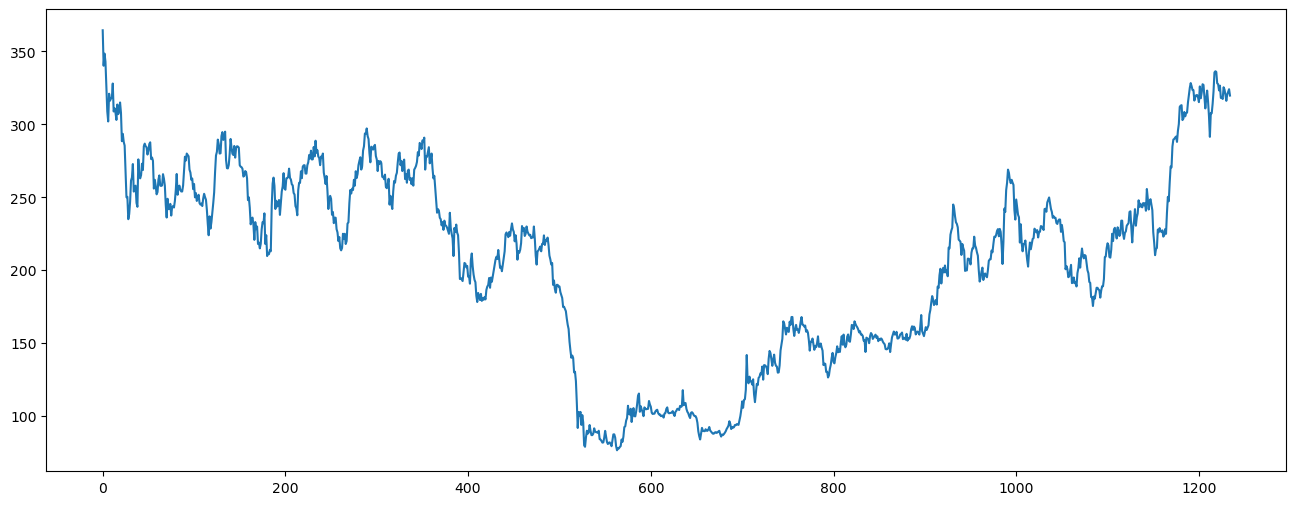

In [9]:
#Visualising open price
canara['Open'].plot(figsize=(16,6))

<AxesSubplot:>

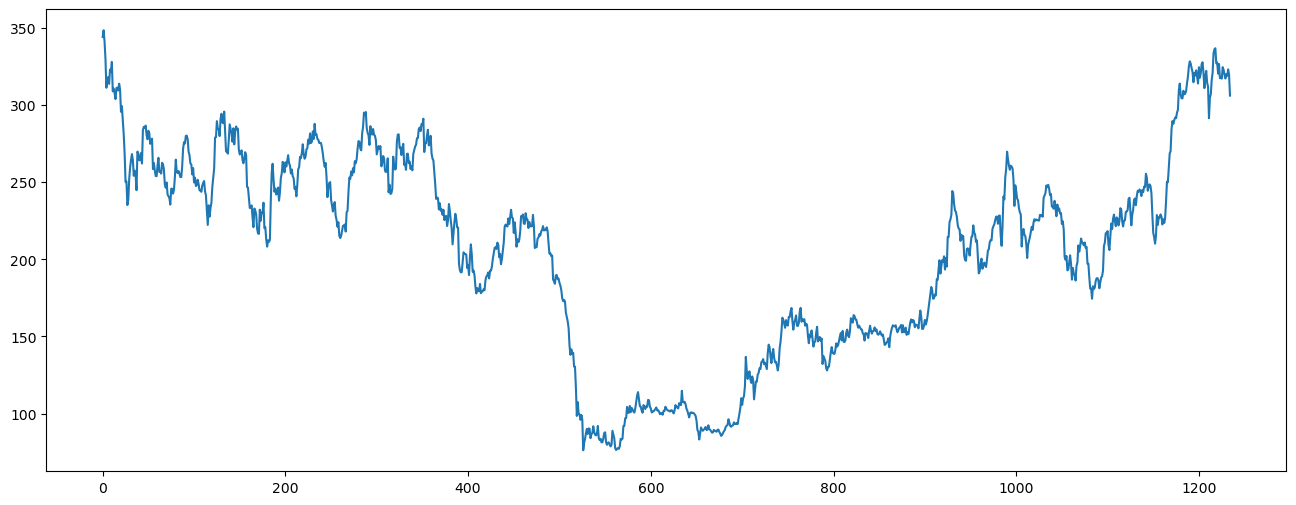

In [10]:
#Visualising close price
canara['Close'].plot(figsize=(16,6))

In [11]:
x22=canara[['Open','High','Low','Adj Close']]
y22=canara['Close']
x22

,Open,High,Low,Adj Close
0,364.500000,364.500000,341.049988,332.755096
1,340.200012,353.350006,340.200012,336.961670
2,348.500000,351.850006,338.899994,329.999054
3,343.000000,360.000000,329.350006,319.313385
4,325.000000,327.000000,308.799988,300.939789
...,...,...,...,...
1230,316.149994,321.200012,314.500000,320.149994
1231,320.500000,326.200012,318.149994,318.899994
1232,322.399994,326.500000,319.600006,323.100006
1233,324.100006,328.000000,318.250000,319.700012


In [12]:
#Splitting given data into training & test data
x22_train,x22_test,y22_train,y22_test=train_test_split(x22,y22,random_state=0)

In [13]:
#Checking size of training and test data
print(x22_train.shape)
print(x22_test.shape)

(926, 4)
(309, 4)


In [14]:
# Fitting Linear Regression Model for "Close Price of BSE of Canara Bank" vs "Open Price,High Price,Low Price, Adj Close Price"  
model22=LinearRegression()
model22.fit(x22_train,y22_train)

LinearRegression()

In [15]:
#Printing model coefficient & intercept
print(model22.coef_)
print(model22.intercept_)

[-0.32933435  0.54210951  0.38916704  0.40207537]
0.7931616725591937


In [16]:
# Predicting stock price with "open price,high price,low price,adjusted close price " as attribute for BSE sensex
predict22=model22.predict(x22_test)
predict22.shape

(309,)

In [17]:
#Priniting Test Data
print(x22_test)

            Open        High         Low   Adj Close
1083  181.550003  183.000000  171.699997  174.449997
18    309.450012  316.299988  309.450012  303.454041
1099  215.250000  221.350006  214.199997  216.600006
818   151.000000  155.250000  148.750000  148.535843
184   213.000000  240.000000  212.000000  230.443298
...          ...         ...         ...         ...
907   177.899994  182.899994  177.399994  176.096207
801   136.199997  139.800003  135.800003  134.127075
1089  187.949997  189.000000  186.649994  187.800003
435   201.600006  204.000000  199.149994  196.887344
833   151.699997  154.300003  149.550003  146.360016

[309 rows x 4 columns]


In [18]:
#Printing Actual & Predicted Stock Price with "Open Price,High Price,Low Price,Adj Close Price" as attribute
dfr22=pd.DataFrame({'Actual Price':y22_test,'Predicted Price':predict22})
print(dfr22)

      Actual Price  Predicted Price
1083    174.449997       177.170577
18      313.799988       312.789016
1099    216.600006       220.348993
818     153.600006       152.837378
184     238.300003       235.910215
...            ...              ...
907     182.100006       181.198587
801     138.699997       138.502814
1089    187.800003       189.501251
435     203.600006       201.655861
833     151.350006       151.528331

[309 rows x 2 columns]


In [19]:
#Printing first 25 values of actual vs predicted stock price
dfr22.head(25)

,Actual Price,Predicted Price
1083,174.449997,177.170577
18,313.799988,312.789016
1099,216.600006,220.348993
818,153.600006,152.837378
184,238.300003,235.910215
608,102.250000,102.416415
1213,307.000000,307.014946
717,125.250000,124.489645
1137,241.000000,243.567187
1009,215.850006,214.150258


In [20]:
#Finding r2 score,mean absolute error and mean squared error of developed model 
score22=model22.score(x22_test,y22_test)*100
print('R2 score of model:',score22,'%')
ae22=metrics.mean_absolute_error(y22_test,predict22)
print('Mean Absolute Error:',ae22)
se22=metrics.mean_squared_error(y22_test,predict22)
print('Mean Squared Error:',se22)

R2 score of model: 99.93194219426846 %
Mean Absolute Error: 1.2544950697086406
Mean Squared Error: 2.8453434772639654


<AxesSubplot:>

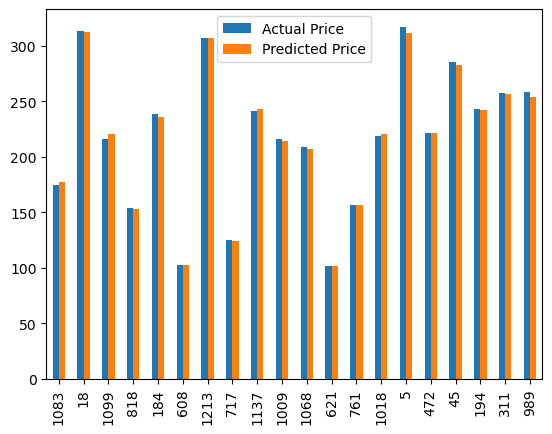

In [21]:
#Plotting actual price & predicted price in form of bar graph
graph22=dfr22.head(20)
graph22.plot(kind='bar')

# STATISTICAL INFERENCES & RESULTS

In [ ]:
# 1) R2 SCORE, MEAN ABSOLUTE ERROR AND MEAN SQUARE ERROR HAVE BEEN USED HERE TO EVALUATE THE DEVELOPED LINEAR REGRESSION MODELS.

# 2) STOCK PRICE (OR CLOSE PRICE) OF ANY STOCK PRIMARLY DEPENDS ON ATTRIBUTES LIKE OPEN PRICE, HIGH PRICE, LOW PRICE, ADJUSTED CLOSING PRICE AND VOLUME OF STOCK.

# 3) AFTER ANALYSIS OF DIFFERENT ATTRIBUTES, IT CAN BE CONCLUDED THAT "ADJUSTED CLOSING PRICE" IS THE BEST FIT ATTRIBUTE FOR PREDICTION OF STOCK PRICE AND "VOLUME OF STOCK" IS THE WORST FIT ATTRIBUTE FOR PREDICTION OF STOCK.

# 4) ERROR IS MORE AND ACCURACY IS LESS ON USING SINGLE ATTRIBUTE FOR DEVELOPING LINEAR REGRESSION MODEL.

# 5) WHEN MORE THAN ONE ATTRIBUTES HAVE BEEN USED TO TRAIN LINEAR REGRESSION MODEL, ACCURACY HAS SHOWN SATISFACTORY IMPROVEMENT.

# 6) ACCURACY CAN BE FURTHER IMPROVED BY IDENTIFYING AND REMOVING OUTLIERS OR BY TAKING MORE TRAINING DATA.

# 7) THERE IS VERY LESS EFFECT OF VOLUME ON THE STOCK PRICE OF DATA.

# 8) OPEN PRICE, HIGH PRICE, LOW PRICE & ADJUSTED CLOSE PRICE SIGNIFICANTLY AFFECT THE STOCK PRICE OF DATA WITH ADJUSTED CLOSE PRICE HAVING THE HIGHEST EFFECT.
